In [1]:
from ssri_interactions.io import load_derived_generic
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from ssri_interactions.decoding.plots import EEGDecodeLoader
from ssri_interactions.transforms.brain_state_transforms import STFTPreprocessor
from ssri_interactions.plots.heatmaps import heatmap, similarity_map, long_raster, state_indicator
from ssri_interactions.config import Config
from ssri_interactions.io import load_lfp

/opt/miniconda3/envs/ssri/lib/python3.8/site-packages/outdated/utils.py:14: OutdatedPackageWarning: The package pingouin is out of date. Your version is 0.5.1, the latest is 0.5.2.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  return warn(


In [2]:
sns.set_theme(context="paper", style="ticks")

In [41]:
# load data
neuron_types = load_derived_generic('neuron_types.csv')
responders_rate = load_derived_generic('brain_states_spikerate_responders.csv').merge(neuron_types[["session_name", "group", "neuron_type", "neuron_id"]])


In [4]:


states_path = Config.derived_data_dir / "lfp_states.csv"
sessions = pd.read_csv(states_path).query("quality in ('good', 'med')").session_name.unique().tolist()
loader = EEGDecodeLoader(states_path=states_path, stft_loader=load_lfp, sessions=sessions)
sessions, neurons  = loader.load_metadata()

In [5]:
cit_sessions = (
    neuron_types[["session_name", "group"]]
    .drop_duplicates()
    .query("session_name in @sessions and group == 'CIT'")
    .session_name.unique().tolist()
)
sal_sessions = (
    neuron_types[["session_name", "group"]]
    .drop_duplicates()
    .query("session_name in @sessions and group == 'SAL'")
    .session_name.unique().tolist()
)

# Slow TS

### Single Session Heat

/Users/ruairiosullivan/repos/SSRI Interactions/ssri_interactions/plots/heatmaps.py:48: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(**yticklabels_kwargs)
/Users/ruairiosullivan/repos/SSRI Interactions/ssri_interactions/plots/heatmaps.py:48: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(**yticklabels_kwargs)


Text(0.5, 16.916666666666707, 'Time (min)')

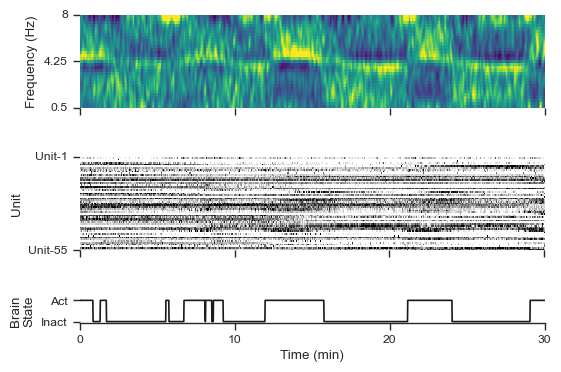

In [29]:
spikes, states, df_fft = loader.load_session_data(sal_sessions[2], t_stop=1802)

preprocessor = STFTPreprocessor(t_stop=1802)
dfp = preprocessor(df_fft)

f = plt.figure(figsize=(6, 4))
axes = f.subplots(3, 1, gridspec_kw=dict(height_ratios=[0.4, 0.4, 0.1], hspace=0.7))
ax_spec, ax_spikes, ax_states = axes
heatmap(
    dfp, 
    heatmap_kwargs=dict(cmap="viridis", vmin=-1, vmax=1, 
            cbar=False,
    ),
    ax=ax_spec,
    locater_x=plt.MultipleLocator(300),
    locater_y=plt.LinearLocator(3),
    tick_params=dict(labelrotation=0, length=5),
    yticklabels_kwargs=dict(labels=[8, 4.25, 0.5]),
    cbar_title_kwargs=dict(label="EEG PSD\n(Z)", pad=10, fontsize="small"),
    cbar_tick_params=dict(length=2),
    cbar_tick_locater=plt.LinearLocator(3)
)
ax_spec.set_ylabel("Frequency (Hz)")

long_raster(
    spikes, 
    ax=ax_spikes,
    minmax=True,
    heatmap_kwargs=dict(
        cmap="Greys", robust=True, 
        cbar=False,
        ),
    locater_x=plt.MultipleLocator(600),
    locater_y=plt.LinearLocator(2),
    tick_params=dict(labelrotation=0, length=5),
    yticklabels_kwargs=dict(labels=["Unit-1", f"Unit-{len(spikes.columns)}"]),
    cbar_title_kwargs=dict(label="Normalized\nSpike Rate", pad=10, fontsize="small"),
    cbar_tick_locater=plt.LinearLocator(2),
    cbar_ticklabel_kwargs=dict(labels=["0", "1"]),
    cbar_tick_params=dict(length=2),
)
ax_spikes.set_ylabel("Unit")


# State Indicator
state_indicator(
    states, 
    ax=ax_states, 
    order=("sw", "act"),
    locater_x=plt.MultipleLocator(600),
    formater_x=plt.FuncFormatter(lambda x, _: f"{x / 60:.0f}"),
    tick_params=dict(length=5),
    ytickslabs=["Inact", "Act"]
    )
ax_states.set_ylabel("Brain\nState")
ax_states.set_xlabel("Time (min)")


/Users/ruairiosullivan/repos/SSRI Interactions/ssri_interactions/plots/heatmaps.py:48: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(**yticklabels_kwargs)
/Users/ruairiosullivan/repos/SSRI Interactions/ssri_interactions/plots/heatmaps.py:48: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(**yticklabels_kwargs)


Text(0.5, 16.916666666666707, 'Time (min)')

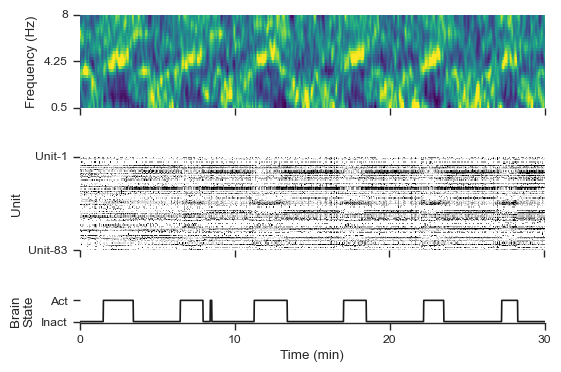

In [31]:
spikes, states, df_fft = loader.load_session_data(cit_sessions[2], t_stop=1802)

preprocessor = STFTPreprocessor(t_stop=1802)
dfp = preprocessor(df_fft)

f = plt.figure(figsize=(6, 4))
axes = f.subplots(3, 1, gridspec_kw=dict(height_ratios=[0.4, 0.4, 0.1], hspace=0.7))
ax_spec, ax_spikes, ax_states = axes
heatmap(
    dfp, 
    heatmap_kwargs=dict(cmap="viridis", vmin=-1, vmax=1, 
            cbar=False,

    # cbar_kws=dict(shrink=0.5, aspect=10, pad=0.15)
    ),
    ax=ax_spec,
    locater_x=plt.MultipleLocator(300),
    locater_y=plt.LinearLocator(3),
    tick_params=dict(labelrotation=0, length=5),
    yticklabels_kwargs=dict(labels=[8, 4.25, 0.5]),
    cbar_title_kwargs=dict(label="EEG PSD\n(Z)", pad=10, fontsize="small"),
    cbar_tick_params=dict(length=2),
    cbar_tick_locater=plt.LinearLocator(3)
)
ax_spec.set_ylabel("Frequency (Hz)")

long_raster(
    spikes, 
    ax=ax_spikes,
    # tfidf=True,
    minmax=True,
    heatmap_kwargs=dict(
        cmap="Greys", robust=True, 
        # vmax=0.29, 
        cbar=False,
        # cbar_kws=dict(shrink=0.5, aspect=10, pad=0.15)
        ),
    locater_x=plt.MultipleLocator(600),
    locater_y=plt.LinearLocator(2),
    tick_params=dict(labelrotation=0, length=5),
    yticklabels_kwargs=dict(labels=["Unit-1", f"Unit-{len(spikes.columns)}"]),
    cbar_title_kwargs=dict(label="Normalized\nSpike Rate", pad=10, fontsize="small"),
    cbar_tick_locater=plt.LinearLocator(2),
    cbar_ticklabel_kwargs=dict(labels=["0", "1"]),
    cbar_tick_params=dict(length=2),
)
ax_spikes.set_ylabel("Unit")


# State Indicator
state_indicator(
    states, 
    ax=ax_states, 
    order=("sw", "act"),
    locater_x=plt.MultipleLocator(600),
    formater_x=plt.FuncFormatter(lambda x, _: f"{x / 60:.0f}"),
    tick_params=dict(length=5),
    ytickslabs=["Inact", "Act"]
    )
ax_states.set_ylabel("Brain\nState")
ax_states.set_xlabel("Time (min)")



#### Mean Catplot by State

In [56]:
from ssri_interactions.plots import PAL_GREY_BLACK

df_counts = pd.read_parquet(
    Config.derived_data_dir / "brain_states_counts.parquet"
).merge(neuron_types[["session_name", "group"]])
df_counts = df_counts[["neuron_id", "neuron_type", "state", "zcounts", "counts", "group"]]

dfp = df_counts.groupby(["neuron_id", "neuron_type", "state", "group"])["zcounts"].mean().reset_index()

g = sns.catplot(
    x="state", 
    y="zcounts", 
    col="neuron_type",
    hue="group",
    sharey=True,
    sharex=True,
    capsize=0.15, 
    height=1, 
    aspect=1.2, 
    color="black",
    kind="point", 
    data=dfp.dropna(),
    scale=0.7,
    facet_kws=dict(gridspec_kws=dict(hspace=0.5, wspace=0.5)),
    palette=PAL_GREY_BLACK,
    hue_order=["CIT", "SAL"],
    col_order=["SR", "SIR", "FF"],
    order=["sw", "act"],
    estimator=np.mean
)
g.set_xlabels("")
g.set_ylabels("")
g.set_titles("{col_name}", pad=25)
g.despine()
g.set_xticklabels(["SW", "Act"], rotation=45)

for ax in g.axes.flatten():
    ax.axhline(0, color="black", linestyle="--", linewidth=0.5)
    ax.set_ylim(-0.5, 0.5)

/opt/miniconda3/envs/ssri/lib/python3.8/site-packages/seaborn/axisgrid.py:118: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  self._figure.tight_layout(*args, **kwargs)
/opt/miniconda3/envs/ssri/lib/python3.8/site-packages/seaborn/axisgrid.py:118: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  self._figure.tight_layout(*args, **kwargs)


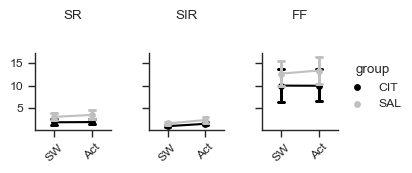

In [58]:

dfp = df_counts.query("group in ('CIT', 'SAL')").groupby(["neuron_id", "neuron_type", "state", "group"])["counts"].mean().reset_index()

g = sns.catplot(
    x="state", 
    y="counts", 
    col="neuron_type",
    hue="group",
    sharey=True,
    sharex=True,
    capsize=0.15, 
    height=1, 
    aspect=1.2, 
    color="black",
    kind="point", 
    data=dfp.dropna(),
    scale=0.7,
    facet_kws=dict(gridspec_kws=dict(hspace=0.5, wspace=0.5)),
    palette=PAL_GREY_BLACK,
    hue_order=["CIT", "SAL"],
    col_order=["SR", "SIR", "FF"],
    order=["sw", "act"],
    estimator=np.mean
)
g.set_xlabels("")
g.set_ylabels("")
g.set_titles("{col_name}", pad=25)
g.despine()
g.set_xticklabels(["SW", "Act"], rotation=45)

# for ax in g.axes.flatten():
    # ax.axhline(0, color="black", linestyle="--", linewidth=0.5)
    # ax.set_ylim(-0.5, 0.5)

#### Response Hist

/opt/miniconda3/envs/ssri/lib/python3.8/site-packages/seaborn/axisgrid.py:118: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  self._figure.tight_layout(*args, **kwargs)


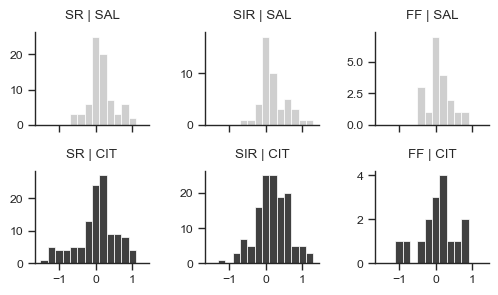

In [49]:
g = sns.FacetGrid(

    col="neuron_type",
    row="group",
    sharey=False,
    # sharex=True,
    height=1.5, 
    aspect=1.3, 
    # color="black",
    # kind="point", 
    data=responders_rate,
    # scale=0.7,
    gridspec_kws=dict(hspace=0.5, wspace=0.5),
    palette=PAL_GREY_BLACK,
    hue_order=["CIT", "SAL"],
    row_order=["SAL", "CIT"],
    col_order=["SR", "SIR", "FF"],
    hue="group"
)
g.map_dataframe(sns.histplot, 
bins=np.arange(-1.5, 1.5, 0.2),
 x="Diff", )
 
g.set_xlabels("")
g.set_ylabels("")
g.set_titles("{col_name} | {row_name}", pad=10)
g.despine()
for ax in g.axes.flatten():
    ax.set_ylabel("")
    ax.set_xlabel("")